In [84]:
# Hi, my name is Hairan Liang and I am a Chess National Master in both the US and Canada. Internationally, I am a 
# Fide Candidate Master. Chess has played a large role in my life, and since I moved into data science, I wanted to 
# combine these two interests. During Winter Break, I decided to embark on a quest to find patterns in my chess games.

# Welcome to my Personal Chess Analysis Data Science Project. The goal of this project is to find patterns and 
# weaknesses in my games, such as chess openings I struggle against. This is Part 1 of my project, and in Part 1
# I am exploring a dataset of games I played on chess.com. I want to be able to build my own dataset using chess pgn
# data. I used Part 1 of this project as a way to sharpen my data cleaning skills as I am working with a messy and
# unfamiliar dataset and also practice semi-complex Python functions. 

# To get my data, I used Reddit User johndoe3991's program to download all of my pgns. The below code block is a link 
# to the program and my personal modifications to it.


In [2]:
# Source: https://www.reddit.com/r/chess/comments/9ifkaq/how_i_downloaded_all_my_chesscom_games_using/
# chess.com API -> https://www.chess.com/news/view/published-data-api
# The API has been used to download monthly archives for a user using a Python3 program.
# This program works as of 24/09/2018

# import urllib
# import urllib.request


# username = "335394862" # change 
# baseUrl = "https://api.chess.com/pub/player/" + username + "/games/"
# archivesUrl = baseUrl + "archives"

# #read the archives url and store in a list
# f = urllib.request.urlopen(archivesUrl)
# archives = f.read().decode("utf-8")
# archives = archives.replace("{\"archives\":[\"", "\",\"")
# archivesList = archives.split("\",\"" + baseUrl)
# archivesList[len(archivesList)-1] = archivesList[len(archivesList)-1].rstrip("\"]}")

# #download all the archives
# for i in range(len(archivesList)-1):
#     url = baseUrl + archivesList[i+1] + "/pgn"
#     filename = archivesList[i+1].replace("/", "-")
#     urllib.request.urlretrieve(url, "/Users/hairanliang/Documents/Chess.com/MyGames" + filename + ".pgn") #change
#     print(filename + ".pgn has been downloaded.")
# print ("All files have been downloaded.")

In [3]:
# Miscellaneous Notes During Data Cleaning:
# I noticed that there were games where no move was played before a player resigned, and these games for some reason 
# led to the dataframe to be offset and thus the columns would be offset. To solve this, I manually searched "Current 
# Position" which helped me manually delete all these games from the pgn (in total 16) as these games had a unique 
# value for their "Current Position" value

In [4]:
# Import the chess modules to read pgns in python
import chess
import chess.pgn 
import cv2
import os

chessGamesList = [] # List that will hold the chess game information

# load_pgns_from_folder("/Users/hairanliang/Documents/Chess.com/MyGames")
pgn = open('/Users/hairanliang/Documents/Chess.com/MyGames/allPgns.txt', 'r')

In [26]:
for i in pgn:
    chessGamesList.append(i) # Getting each line of the pgn document one by one
    


In [6]:
chessGamesList[22] # In index 22 of the list, it holds the game notation for game 1.  

'1. e4 {[%clk 0:09:56.3]} 1... e5 {[%clk 0:09:58.8]} 2. Nf3 {[%clk 0:09:55.2]} 2... Nc6 {[%clk 0:09:57.8]} 3. Nc3 {[%clk 0:09:53.2]} 3... a6 {[%clk 0:09:52.7]} 4. Bc4 {[%clk 0:09:51.3]} 4... h6 {[%clk 0:09:51.5]} 5. O-O {[%clk 0:09:39]} 5... Nf6 {[%clk 0:09:50.3]} 6. d4 {[%clk 0:09:28.7]} 6... exd4 {[%clk 0:09:44.4]} 7. Nxd4 {[%clk 0:09:26]} 7... Nxd4 {[%clk 0:09:43.7]} 8. Qxd4 {[%clk 0:09:23.2]} 8... Be7 {[%clk 0:09:42.1]} 9. Bf4 {[%clk 0:09:17.8]} 9... c5 {[%clk 0:09:39.9]} 10. Qe5 {[%clk 0:09:09.3]} 10... O-O {[%clk 0:09:38.4]} 11. Qf5 {[%clk 0:08:52.8]} 11... d6 {[%clk 0:09:36.4]} 12. Qd5 {[%clk 0:08:25.5]} 12... Nxd5 {[%clk 0:09:34.7]} 13. Bxd5 {[%clk 0:08:23.9]} 13... Bf6 {[%clk 0:09:25.8]} 14. Ne2 {[%clk 0:08:03.4]} 14... Bxb2 {[%clk 0:09:23.4]} 15. Rab1 {[%clk 0:07:57.8]} 15... Be5 {[%clk 0:09:19.2]} 16. Bxe5 {[%clk 0:07:44.8]} 16... dxe5 {[%clk 0:09:17.8]} 17. Rbd1 {[%clk 0:07:42.7]} 17... Bd7 {[%clk 0:09:16.1]} 18. Bxb7 {[%clk 0:07:37.9]} 18... Rb8 {[%clk 0:09:14.8]} 19. Bd5 

In [7]:
# Exploratory Data Analysis

# Look at basic things like my winrate as white and black. Then look at average number of moves per game, per win, 
# per loss, per draw, as white, as black, etc.
# Then, I can start playing with date-time data by looking at which days of the week I play better, which time of day,
# etc

In [8]:
# First, I have to create my DataFrame. I will use a Pandas Dataframe for this

# Using list comprehension to create a 2d list, and then converting it into a pandas DataFrame later
twoDArray = [[''] * 25 for i in range(5000)]

# Filling up my 2d list with the chessGamesList
counter = 0
for row in range(0, len(chessGamesList)):
    holder = row # Have to use the holder since the row value in chessGamesList is getting rewritten in the line below
    row = row % 25 # Every 25 indices in chessGamesList, it moves on to the next game in the dataset
    twoDArray[counter][row] = chessGamesList[holder];
    if row == 0: # Once reaching the next game, have to move to the row below to input next values 
        counter = counter + 1
    row += 1




In [9]:
twoDArray[3800] # This holds all the information from the initial dataset for the longest game I've played (120 moves)

['[Event "Live Chess"]\n',
 '[Site "Chess.com"]\n',
 '[Date "2020.10.02"]\n',
 '[Round "-"]\n',
 '[White "335394862"]\n',
 '[Black "JoeBruin"]\n',
 '[Result "0-1"]\n',
 '[CurrentPosition "8/8/8/8/1k1K4/8/q7/8 w - -"]\n',
 '[Timezone "UTC"]\n',
 '[ECO "B00"]\n',
 '[ECOUrl "https://www.chess.com/openings/Nimzowitsch-Defense-Declined"]\n',
 '[UTCDate "2020.10.02"]\n',
 '[UTCTime "03:45:24"]\n',
 '[WhiteElo "2238"]\n',
 '[BlackElo "2113"]\n',
 '[TimeControl "180+2"]\n',
 '[Termination "JoeBruin won by resignation"]\n',
 '[StartTime "03:45:24"]\n',
 '[EndDate "2020.10.02"]\n',
 '[EndTime "04:00:09"]\n',
 '[Link "https://www.chess.com/game/live/5526078426"]\n',
 '\n',
 '1. Nf3 {[%clk 0:02:54]} 1... Nc6 {[%clk 0:03:00.5]} 2. e4 {[%clk 0:02:52.7]} 2... e5 {[%clk 0:03:01.2]} 3. d4 {[%clk 0:02:54.1]} 3... exd4 {[%clk 0:03:01.9]} 4. Nxd4 {[%clk 0:02:56]} 4... Bc5 {[%clk 0:03:03.1]} 5. Be3 {[%clk 0:02:56.6]} 5... Qf6 {[%clk 0:03:02.9]} 6. c3 {[%clk 0:02:58.1]} 6... d6 {[%clk 0:02:32.8]} 7. Bc4 {[%

In [27]:
# Building my dataframe using twoDArray. Column names are based on the name convention from the dataset

import pandas as pd
df1 = pd.DataFrame(data = twoDArray, columns = ['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result', 'Position', 'Timezone', 
                              'ECO', 'ECOUrl', 'UTCDate', 'UTCTime', 'WhiteElo', 'BlackElo', 'TimeControl', 'Termination', 'StartTime',
                              'EndDate', 'EndTime', 'Link', 'Null1', 'Moves', 'Null2', 'Null3'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df1.head(25)



,Event,Site,Date,Round,White,Black,Result,Position,Timezone,ECO,ECOUrl,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link,Null1,Moves,Null2,Null3
0,"[Event ""Live Chess""]\n",,,,,,,,,,,,,,,,,,,,,,,,
1,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""sandy1999""]\n","[Result ""0-1""]\n","[CurrentPosition ""8/6pk/p6p/2p1p3/2P1b2P/6P1/P...","[Timezone ""UTC""]\n","[ECO ""C46""]\n","[ECOUrl ""https://www.chess.com/openings/Three-...","[UTCDate ""2012.02.01""]\n","[UTCTime ""03:00:12""]\n","[WhiteElo ""1071""]\n","[BlackElo ""1190""]\n","[TimeControl ""600""]\n","[Termination ""sandy1999 won by checkmate""]\n","[StartTime ""03:00:12""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""03:07:13""]\n","[Link ""https://www.chess.com/game/live/2432235...",\n,1. e4 {[%clk 0:09:56.3]} 1... e5 {[%clk 0:09:5...,\n,\n
2,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""gemate""]\n","[Result ""1-0""]\n","[CurrentPosition ""r3kb1r/ppp1p2p/q4pp1/8/5NnP/...","[Timezone ""UTC""]\n","[ECO ""A06""]\n","[ECOUrl ""https://www.chess.com/openings/Reti-O...","[UTCDate ""2012.02.01""]\n","[UTCTime ""02:48:32""]\n","[WhiteElo ""849""]\n","[BlackElo ""838""]\n","[TimeControl ""60""]\n","[Termination ""335394862 won on time""]\n","[StartTime ""02:48:32""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""02:50:30""]\n","[Link ""https://www.chess.com/game/live/2432198...",\n,1. e4 {[%clk 0:01:00]} 1... d5 {[%clk 0:01:00]...,\n,\n
3,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""projectingpeace""]\n","[Result ""0-1""]\n","[CurrentPosition ""5k2/5P2/5KP1/1P6/3n1q2/8/1n6...","[Timezone ""UTC""]\n","[ECO ""C61""]\n","[ECOUrl ""https://www.chess.com/openings/Ruy-Lo...","[UTCDate ""2012.02.01""]\n","[UTCTime ""02:27:28""]\n","[WhiteElo ""1081""]\n","[BlackElo ""1077""]\n","[TimeControl ""600""]\n","[Termination ""projectingpeace won by checkmate...","[StartTime ""02:27:28""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""02:47:23""]\n","[Link ""https://www.chess.com/game/live/2432131...",\n,1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...,\n,\n
4,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.31""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""jimmyjimenez""]\n","[Result ""0-1""]\n","[CurrentPosition ""r1bqkbnr/pppp1ppp/2n5/4p3/4P...","[Timezone ""UTC""]\n","[ECO ""C46""]\n","[ECOUrl ""https://www.chess.com/openings/Three-...","[UTCDate ""2012.01.31""]\n","[UTCTime ""01:20:41""]\n","[WhiteElo ""1097""]\n","[BlackElo ""1135""]\n","[TimeControl ""600""]\n","[Termination ""jimmyjimenez won by resignation""]\n","[StartTime ""01:20:41""]\n","[EndDate ""2012.01.31""]\n","[EndTime ""01:20:56""]\n","[Link ""https://www.chess.com/game/live/2426913...",\n,1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:55]...,\n,\n
5,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.31""]\n","[Round ""-""]\n","[White ""nyjah""]\n","[Black ""335394862""]\n","[Result ""0-1""]\n","[CurrentPosition ""8/R7/K2pk1p1/1qr2p2/7P/4P3/5...","[Timezone ""UTC""]\n","[ECO ""A21""]\n","[ECOUrl ""https://www.chess.com/openings/Englis...","[UTCDate ""2012.01.31""]\n","[UTCTime ""01:00:44""]\n","[WhiteElo ""1187""]\n","[BlackElo ""1112""]\n","[TimeControl ""600""]\n","[Termination ""335394862 won by checkmate""]\n","[StartTime ""01:00:44""]\n","[EndDate ""2012.01.31""]\n","[EndTime ""01:19:12""]\n","[Link ""https://www.chess.com/game/live/2426847...",\n,1. c4 {[%clk 0:09:42.8]} 1... e5 {[%clk 0:09:5...,\n,\n
6,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.30""]\n","[Round ""-""]\n","[White ""mollyjones""]\n","[Black ""335394862""]\n","[Result ""1-0""]\n","[CurrentPosition ""1k6/8/8/1RB1N3/1P3P2/PP2P1P1...","[Timezone ""UTC""]\n","[ECO ""A40""]\n","[ECOUrl ""https://www.c

In [11]:
# Now, I will get rid of all Null columns. There is also a problem with the first row, but I will fix that later

df2 = df1.drop(columns = ['Null1', 'Null2', 'Null3'])

In [12]:
df2.head(25)

,Event,Site,Date,Round,White,Black,Result,Position,Timezone,ECO,ECOUrl,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link,Moves
0,"[Event ""Live Chess""]\n",,,,,,,,,,,,,,,,,,,,,
1,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""sandy1999""]\n","[Result ""0-1""]\n","[CurrentPosition ""8/6pk/p6p/2p1p3/2P1b2P/6P1/P...","[Timezone ""UTC""]\n","[ECO ""C46""]\n","[ECOUrl ""https://www.chess.com/openings/Three-...","[UTCDate ""2012.02.01""]\n","[UTCTime ""03:00:12""]\n","[WhiteElo ""1071""]\n","[BlackElo ""1190""]\n","[TimeControl ""600""]\n","[Termination ""sandy1999 won by checkmate""]\n","[StartTime ""03:00:12""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""03:07:13""]\n","[Link ""https://www.chess.com/game/live/2432235...",1. e4 {[%clk 0:09:56.3]} 1... e5 {[%clk 0:09:5...
2,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""gemate""]\n","[Result ""1-0""]\n","[CurrentPosition ""r3kb1r/ppp1p2p/q4pp1/8/5NnP/...","[Timezone ""UTC""]\n","[ECO ""A06""]\n","[ECOUrl ""https://www.chess.com/openings/Reti-O...","[UTCDate ""2012.02.01""]\n","[UTCTime ""02:48:32""]\n","[WhiteElo ""849""]\n","[BlackElo ""838""]\n","[TimeControl ""60""]\n","[Termination ""335394862 won on time""]\n","[StartTime ""02:48:32""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""02:50:30""]\n","[Link ""https://www.chess.com/game/live/2432198...",1. e4 {[%clk 0:01:00]} 1... d5 {[%clk 0:01:00]...
3,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""projectingpeace""]\n","[Result ""0-1""]\n","[CurrentPosition ""5k2/5P2/5KP1/1P6/3n1q2/8/1n6...","[Timezone ""UTC""]\n","[ECO ""C61""]\n","[ECOUrl ""https://www.chess.com/openings/Ruy-Lo...","[UTCDate ""2012.02.01""]\n","[UTCTime ""02:27:28""]\n","[WhiteElo ""1081""]\n","[BlackElo ""1077""]\n","[TimeControl ""600""]\n","[Termination ""projectingpeace won by checkmate...","[StartTime ""02:27:28""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""02:47:23""]\n","[Link ""https://www.chess.com/game/live/2432131...",1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...
4,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.31""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""jimmyjimenez""]\n","[Result ""0-1""]\n","[CurrentPosition ""r1bqkbnr/pppp1ppp/2n5/4p3/4P...","[Timezone ""UTC""]\n","[ECO ""C46""]\n","[ECOUrl ""https://www.chess.com/openings/Three-...","[UTCDate ""2012.01.31""]\n","[UTCTime ""01:20:41""]\n","[WhiteElo ""1097""]\n","[BlackElo ""1135""]\n","[TimeControl ""600""]\n","[Termination ""jimmyjimenez won by resignation""]\n","[StartTime ""01:20:41""]\n","[EndDate ""2012.01.31""]\n","[EndTime ""01:20:56""]\n","[Link ""https://www.chess.com/game/live/2426913...",1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:55]...
5,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.31""]\n","[Round ""-""]\n","[White ""nyjah""]\n","[Black ""335394862""]\n","[Result ""0-1""]\n","[CurrentPosition ""8/R7/K2pk1p1/1qr2p2/7P/4P3/5...","[Timezone ""UTC""]\n","[ECO ""A21""]\n","[ECOUrl ""https://www.chess.com/openings/Englis...","[UTCDate ""2012.01.31""]\n","[UTCTime ""01:00:44""]\n","[WhiteElo ""1187""]\n","[BlackElo ""1112""]\n","[TimeControl ""600""]\n","[Termination ""335394862 won by checkmate""]\n","[StartTime ""01:00:44""]\n","[EndDate ""2012.01.31""]\n","[EndTime ""01:19:12""]\n","[Link ""https://www.chess.com/game/live/2426847...",1. c4 {[%clk 0:09:42.8]} 1... e5 {[%clk 0:09:5...
6,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.30""]\n","[Round ""-""]\n","[White ""mollyjones""]\n","[Black ""335394862""]\n","[Result ""1-0""]\n","[CurrentPosition ""1k6/8/8/1RB1N3/1P3P2/PP2P1P1...","[Timezone ""UTC""]\n","[ECO ""A40""]\n","[ECOUrl ""https://www.chess.com/openings/Queens...","[UTCDate ""2012.01.30""]\n","[UTCTim

In [13]:
# Now, drop all rows with NaN values. First, I will convert all the empty strings

import numpy as np
df2.replace('', np.nan, inplace=True)
df2 = df2.drop([0]).reset_index(drop=True)
df2.iat[4445, 0] = '[Event "Live Chess"]\n' # Small edits to clean up the dataset 

In [29]:
df3 = df2.dropna(axis='rows') # Drop all rows that have any null values in them

In [30]:
df3.head(25) # Final DataFrame that has all the information and no NaN values

,Event,Site,Date,Round,White,Black,Result,Position,Timezone,ECO,ECOUrl,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link,Moves
0,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""sandy1999""]\n","[Result ""0-1""]\n","[CurrentPosition ""8/6pk/p6p/2p1p3/2P1b2P/6P1/P...","[Timezone ""UTC""]\n","[ECO ""C46""]\n","[ECOUrl ""https://www.chess.com/openings/Three-...","[UTCDate ""2012.02.01""]\n","[UTCTime ""03:00:12""]\n","[WhiteElo ""1071""]\n","[BlackElo ""1190""]\n","[TimeControl ""600""]\n","[Termination ""sandy1999 won by checkmate""]\n","[StartTime ""03:00:12""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""03:07:13""]\n","[Link ""https://www.chess.com/game/live/2432235...",1. e4 {[%clk 0:09:56.3]} 1... e5 {[%clk 0:09:5...
1,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""gemate""]\n","[Result ""1-0""]\n","[CurrentPosition ""r3kb1r/ppp1p2p/q4pp1/8/5NnP/...","[Timezone ""UTC""]\n","[ECO ""A06""]\n","[ECOUrl ""https://www.chess.com/openings/Reti-O...","[UTCDate ""2012.02.01""]\n","[UTCTime ""02:48:32""]\n","[WhiteElo ""849""]\n","[BlackElo ""838""]\n","[TimeControl ""60""]\n","[Termination ""335394862 won on time""]\n","[StartTime ""02:48:32""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""02:50:30""]\n","[Link ""https://www.chess.com/game/live/2432198...",1. e4 {[%clk 0:01:00]} 1... d5 {[%clk 0:01:00]...
2,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""projectingpeace""]\n","[Result ""0-1""]\n","[CurrentPosition ""5k2/5P2/5KP1/1P6/3n1q2/8/1n6...","[Timezone ""UTC""]\n","[ECO ""C61""]\n","[ECOUrl ""https://www.chess.com/openings/Ruy-Lo...","[UTCDate ""2012.02.01""]\n","[UTCTime ""02:27:28""]\n","[WhiteElo ""1081""]\n","[BlackElo ""1077""]\n","[TimeControl ""600""]\n","[Termination ""projectingpeace won by checkmate...","[StartTime ""02:27:28""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""02:47:23""]\n","[Link ""https://www.chess.com/game/live/2432131...",1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...
3,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.31""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""jimmyjimenez""]\n","[Result ""0-1""]\n","[CurrentPosition ""r1bqkbnr/pppp1ppp/2n5/4p3/4P...","[Timezone ""UTC""]\n","[ECO ""C46""]\n","[ECOUrl ""https://www.chess.com/openings/Three-...","[UTCDate ""2012.01.31""]\n","[UTCTime ""01:20:41""]\n","[WhiteElo ""1097""]\n","[BlackElo ""1135""]\n","[TimeControl ""600""]\n","[Termination ""jimmyjimenez won by resignation""]\n","[StartTime ""01:20:41""]\n","[EndDate ""2012.01.31""]\n","[EndTime ""01:20:56""]\n","[Link ""https://www.chess.com/game/live/2426913...",1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:55]...
4,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.31""]\n","[Round ""-""]\n","[White ""nyjah""]\n","[Black ""335394862""]\n","[Result ""0-1""]\n","[CurrentPosition ""8/R7/K2pk1p1/1qr2p2/7P/4P3/5...","[Timezone ""UTC""]\n","[ECO ""A21""]\n","[ECOUrl ""https://www.chess.com/openings/Englis...","[UTCDate ""2012.01.31""]\n","[UTCTime ""01:00:44""]\n","[WhiteElo ""1187""]\n","[BlackElo ""1112""]\n","[TimeControl ""600""]\n","[Termination ""335394862 won by checkmate""]\n","[StartTime ""01:00:44""]\n","[EndDate ""2012.01.31""]\n","[EndTime ""01:19:12""]\n","[Link ""https://www.chess.com/game/live/2426847...",1. c4 {[%clk 0:09:42.8]} 1... e5 {[%clk 0:09:5...
5,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.30""]\n","[Round ""-""]\n","[White ""mollyjones""]\n","[Black ""335394862""]\n","[Result ""1-0""]\n","[CurrentPosition ""1k6/8/8/1RB1N3/1P3P2/PP2P1P1...","[Timezone ""UTC""]\n","[ECO ""A40""]\n","[ECOUrl ""https://www.chess.com/openings/Queens...","[UTCDate ""2012.01.30""]\n","[UTCTime ""02:04:15""]\n","[WhiteElo ""1310""]\n","[Black

In [31]:
terminationSeries = pd.Series(df3['Termination'].values) # Building a Series with the Termination column
# The termination column tells who wins, or if it was a draw.

In [32]:
terminationSeries

0            [Termination "sandy1999 won by checkmate"]\n
1                 [Termination "335394862 won on time"]\n
2       [Termination "projectingpeace won by checkmate...
3       [Termination "jimmyjimenez won by resignation"]\n
4            [Termination "335394862 won by checkmate"]\n
5                [Termination "mollyjones won on time"]\n
6                [Termination "mollyjones won on time"]\n
7       [Termination "Computer3-HARD won by checkmate"]\n
8             [Termination "viveiros won by checkmate"]\n
9             [Termination "viveiros won by checkmate"]\n
10            [Termination "kc-666 won by resignation"]\n
11                 [Termination "lcv won by checkmate"]\n
12           [Termination "335394862 won by checkmate"]\n
13             [Termination "hezza65 won by checkmate"]\n
14           [Termination "335394862 won by checkmate"]\n
15             [Termination "Solariumking won on time"]\n
16             [Termination "Solariumking won on time"]\n
17            

In [33]:
terminationBool = terminationSeries.str.contains(pat = '335394862') # terminationBool is essentially my "winBool", so
# it will hold a logical array of the games I won. This is based on if my username is in the Termination value.

In [34]:
terminationBool

0       False
1        True
2       False
3       False
4        True
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12       True
13      False
14       True
15      False
16      False
17      False
18       True
19      False
20       True
21      False
22      False
23      False
24       True
25       True
26      False
27       True
28       True
29      False
30      False
31      False
32       True
33       True
34      False
35      False
36      False
37      False
38       True
39      False
40       True
41      False
42      False
43       True
44       True
45      False
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55      False
56       True
57      False
58      False
59      False
60       True
61       True
62      False
63      False
64       True
65      False
66      False
67       True
68      False
69      False
70       True
71    

In [35]:
# To get losses, it is more difficult, so what I'll do is check for the draws and then the remaining ones must be losses.

drawBool = terminationSeries.str.contains(pat = 'Game drawn')
drawBool

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45       True
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55       True
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [36]:
lossBool = ~drawBool & ~terminationBool # Losses are when its neither a draw nor a win
lossBool

0        True
1       False
2        True
3        True
4       False
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13       True
14      False
15       True
16       True
17       True
18      False
19       True
20      False
21       True
22       True
23       True
24      False
25      False
26       True
27      False
28      False
29       True
30       True
31       True
32      False
33      False
34       True
35       True
36       True
37       True
38      False
39       True
40      False
41       True
42       True
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57       True
58       True
59       True
60      False
61      False
62       True
63       True
64      False
65       True
66       True
67      False
68       True
69       True
70      False
71    

In [37]:
winRate = sum(bool(x) for x in terminationBool) / len(terminationBool) 
winRate # This is my overall winrate. Technically, it's not my true "winrate" because I haven't factored in draws

0.5143949617633828

In [38]:
drawRate = sum(bool(x) for x in drawBool) / len(terminationBool)
drawRate

0.06185335132703554

In [39]:
lossRate = sum(bool(x) for x in lossBool) / len(terminationBool)
lossRate

0.42375168690958165

In [40]:
# Now, let's find my winrate as white and as black

# Boolean array for games where I am white

whiteSeries = pd.Series(df3['White'].values) # Using the white column of the Dataframe
whiteBool = whiteSeries.str.contains(pat = '335394862') # Getting a boolean list for where I played white



In [41]:
whiteBool # In the first 4 games, I played white, then I played black twice... etc

0        True
1        True
2        True
3        True
4       False
5       False
6        True
7       False
8       False
9        True
10      False
11       True
12      False
13       True
14      False
15       True
16      False
17       True
18       True
19      False
20       True
21       True
22       True
23      False
24      False
25       True
26      False
27       True
28       True
29      False
30      False
31       True
32       True
33      False
34       True
35      False
36      False
37       True
38       True
39      False
40      False
41       True
42      False
43      False
44       True
45      False
46       True
47       True
48      False
49       True
50       True
51      False
52       True
53      False
54       True
55      False
56      False
57      False
58       True
59       True
60      False
61       True
62      False
63      False
64       True
65      False
66       True
67       True
68      False
69       True
70      False
71    

In [42]:
whiteTermination = terminationSeries[whiteBool] # Using the boolean list to create a termination series with only my 
# games as white

In [43]:
whiteTermination # These are the termination values for only the games where I played white

0            [Termination "sandy1999 won by checkmate"]\n
1                 [Termination "335394862 won on time"]\n
2       [Termination "projectingpeace won by checkmate...
3       [Termination "jimmyjimenez won by resignation"]\n
6                [Termination "mollyjones won on time"]\n
9             [Termination "viveiros won by checkmate"]\n
11                 [Termination "lcv won by checkmate"]\n
13             [Termination "hezza65 won by checkmate"]\n
15             [Termination "Solariumking won on time"]\n
17             [Termination "Solariumking won on time"]\n
18                [Termination "335394862 won on time"]\n
20                [Termination "335394862 won on time"]\n
21       [Termination "dimitrismpd won by resignation"]\n
22           [Termination "juanitojr won by checkmate"]\n
25                [Termination "335394862 won on time"]\n
27           [Termination "335394862 won by checkmate"]\n
28         [Termination "335394862 won by resignation"]\n
31            

In [44]:
whiteTerminationBool = whiteTermination.str.contains(pat = '335394862') # Only the games where I won as white
whiteWinrate = sum(bool(x) for x in whiteTerminationBool) / len(whiteTerminationBool) 
# Number of games I won as white divided by number of games I played as white 
whiteWinrate

0.5332128332580208

In [45]:
# Now, I repeat this for the black games

blackSeries = pd.Series(df3['Black'].values) 
blackBool = blackSeries.str.contains(pat = '335394862')

blackTermination = terminationSeries[blackBool] 

blackTerminationBool = blackTermination.str.contains(pat = '335394862') # Only the white games where I won (white game = I'm playing white)
blackWinrate = sum(bool(x) for x in blackTerminationBool) / len(blackTerminationBool) 
blackWinrate # Unsurprisingly, my winrate as white is higher than as black: white has an inherent advantage

0.4957456336766682

In [46]:
blackTerminationBool

4        True
5       False
7       False
8       False
10      False
12       True
14       True
16      False
19      False
23      False
24       True
26      False
29      False
30      False
33       True
35      False
36      False
39      False
40       True
42      False
43       True
45      False
48       True
51       True
53       True
55      False
56       True
57      False
60       True
62      False
63      False
65      False
68      False
70       True
72       True
73      False
75      False
76       True
80      False
82      False
84      False
85      False
87       True
89       True
93       True
94      False
96       True
97      False
100     False
101      True
105     False
107     False
109      True
111     False
112     False
114     False
117     False
119     False
121      True
122      True
123     False
125      True
126     False
128      True
129     False
132     False
134      True
135     False
136      True
138      True
139     False
140   

In [47]:
# Now I want to find out if I have a higher win-rate when I play black against 1. e4 or 1. d4 
# My gut says that I do much better against e4

movesSeries = pd.Series(df3['Moves'].values) 

e4Bool = movesSeries.str.contains(pat = '1\. e4')
e4Bool

0        True
1        True
2        True
3        True
4       False
5       False
6       False
7       False
8       False
9        True
10       True
11       True
12       True
13       True
14       True
15      False
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23      False
24       True
25       True
26       True
27       True
28       True
29      False
30      False
31       True
32       True
33       True
34       True
35      False
36      False
37       True
38       True
39      False
40      False
41       True
42       True
43       True
44       True
45       True
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53      False
54       True
55       True
56       True
57      False
58       True
59       True
60       True
61       True
62       True
63      False
64       True
65       True
66       True
67       True
68      False
69       True
70      False
71    

In [48]:
e4Termination = terminationSeries[e4Bool] # The termination column for games that started as 1. e4
e4Termination

0            [Termination "sandy1999 won by checkmate"]\n
1                 [Termination "335394862 won on time"]\n
2       [Termination "projectingpeace won by checkmate...
3       [Termination "jimmyjimenez won by resignation"]\n
9             [Termination "viveiros won by checkmate"]\n
10            [Termination "kc-666 won by resignation"]\n
11                 [Termination "lcv won by checkmate"]\n
12           [Termination "335394862 won by checkmate"]\n
13             [Termination "hezza65 won by checkmate"]\n
14           [Termination "335394862 won by checkmate"]\n
16             [Termination "Solariumking won on time"]\n
17             [Termination "Solariumking won on time"]\n
18                [Termination "335394862 won on time"]\n
19         [Termination "ITS_ME84123 won by checkmate"]\n
20                [Termination "335394862 won on time"]\n
21       [Termination "dimitrismpd won by resignation"]\n
22           [Termination "juanitojr won by checkmate"]\n
24           [

In [49]:
e4TerminationBool = e4Termination.str.contains(pat = '335394862')
e4TerminationBool

0       False
1        True
2       False
3       False
9       False
10      False
11      False
12       True
13      False
14       True
16      False
17      False
18       True
19      False
20       True
21      False
22      False
24       True
25       True
26      False
27       True
28       True
31      False
32       True
33       True
34      False
37      False
38       True
41      False
42      False
43       True
44       True
45      False
46       True
47       True
48       True
49       True
50       True
51       True
52       True
54       True
55      False
56       True
58      False
59      False
60       True
61       True
62      False
64       True
65      False
66      False
67       True
69      False
72       True
74      False
75      False
77       True
78       True
79      False
80      False
81      False
82      False
83      False
84      False
86       True
87       True
88      False
89       True
90       True
91      False
92       True
94    

In [50]:
blackTerminationBool

4        True
5       False
7       False
8       False
10      False
12       True
14       True
16      False
19      False
23      False
24       True
26      False
29      False
30      False
33       True
35      False
36      False
39      False
40       True
42      False
43       True
45      False
48       True
51       True
53       True
55      False
56       True
57      False
60       True
62      False
63      False
65      False
68      False
70       True
72       True
73      False
75      False
76       True
80      False
82      False
84      False
85      False
87       True
89       True
93       True
94      False
96       True
97      False
100     False
101      True
105     False
107     False
109      True
111     False
112     False
114     False
117     False
119     False
121      True
122      True
123     False
125      True
126     False
128      True
129     False
132     False
134      True
135     False
136      True
138      True
139     False
140   

In [51]:
e4BlackTerminationBool = e4TerminationBool & blackTerminationBool
e4BlackTerminationBool # The only true is if both it was an e4 game AND I won the game as black
# (True + True = True and anything else is False)

0       False
1       False
2       False
3       False
4       False
5       False
7       False
8       False
9       False
10      False
11      False
12       True
13      False
14       True
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24       True
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33       True
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43       True
44      False
45      False
46      False
47      False
48       True
49      False
50      False
51       True
52      False
53      False
54      False
55      False
56       True
57      False
58      False
59      False
60       True
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
72       True
73      False
74    

In [52]:
blackAndE4 = e4Bool & blackBool
blackAndE4


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10       True
11      False
12       True
13      False
14       True
15      False
16       True
17      False
18      False
19       True
20      False
21      False
22      False
23      False
24       True
25      False
26       True
27      False
28      False
29      False
30      False
31      False
32      False
33       True
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42       True
43       True
44      False
45       True
46      False
47      False
48       True
49      False
50      False
51       True
52      False
53      False
54      False
55       True
56       True
57      False
58      False
59      False
60       True
61      False
62       True
63      False
64      False
65       True
66      False
67      False
68      False
69      False
70      False
71    

In [53]:
blackAndE4WR = sum(bool(x) for x in e4BlackTerminationBool) / sum(bool(x) for x in blackAndE4) 
blackAndE4WR # My winrate as black against e4 is 0.51, so I do pretty well against 1.e4

0.5132819194515853

In [54]:
d4Bool = movesSeries.str.contains(pat = '1\. d4')
d4Termination = terminationSeries[d4Bool]
d4TerminationBool = d4Termination.str.contains(pat = '335394862')
d4BlackTerminationBool = d4TerminationBool & blackTerminationBool
blackAndD4 = d4Bool & blackBool
blackAndD4WR = sum(bool(x) for x in d4BlackTerminationBool) / sum(bool(x) for x in blackAndD4) 
blackAndD4WR

# As I expected, my play against d4 is significantly worse: I have a 47.6% winrate as black compared to 51.3% against
# e4. I'll now check two less popular but possible moves 1.c4 and 1.Nf3

0.47649918962722854

In [55]:
c4Bool = movesSeries.str.contains(pat = '1\. c4')
c4Termination = terminationSeries[c4Bool]
c4TerminationBool = c4Termination.str.contains(pat = '335394862')
c4BlackTerminationBool = c4TerminationBool & blackTerminationBool
blackAndC4 = c4Bool & blackBool
blackAndC4WR = sum(bool(x) for x in c4BlackTerminationBool) / sum(bool(x) for x in blackAndC4) 
blackAndC4WR

# Surprisingly, I perform HORRIBLY against c4. Maybe it's time for me to freshen up on my c4 opening theory

0.4228187919463087

In [56]:
nf3Bool = movesSeries.str.contains(pat = '1\. Nf3')
nf3Termination = terminationSeries[nf3Bool]
nf3TerminationBool = nf3Termination.str.contains(pat = '335394862')
nf3BlackTerminationBool = nf3TerminationBool & blackTerminationBool
blackAndNf3 = nf3Bool & blackBool
blackAndNf3WR = sum(bool(x) for x in nf3BlackTerminationBool) / sum(bool(x) for x in blackAndNf3) 
blackAndNf3WR

0.5056818181818182

In [57]:
# Now, I want to find out how I do against black openings when I play 1.e4 as white. My hunch is that I perform best 
# against the French, then the Caro Kann, then Sicilian, then 1... e5. Let's find out!

# I have a bool that checks for 1.e4, and now I need bools that check for 1... e5, 1... c5, 1... c6, 1... e6

e5Bool = movesSeries.str.contains(pat = ' 1\.\.\. e5') 
e5Termination = terminationSeries[e5Bool]
e5TerminationBool = e5Termination.str.contains(pat = '335394862')
e4E5WhiteTerminationBool = e5TerminationBool & whiteTerminationBool & e4TerminationBool
whiteAndE4E5 = e5Bool & whiteBool & e4Bool
whiteAndE4E5WR = sum(bool(x) for x in e4E5WhiteTerminationBool) / sum(bool(x) for x in whiteAndE4E5) 
whiteAndE4E5WR

0.5427927927927928

In [58]:
sum(bool(x) for x in e4E5WhiteTerminationBool)


241

In [59]:
c5Bool = movesSeries.str.contains(pat = ' 1\.\.\. c5')
c5Termination = terminationSeries[c5Bool]
c5TerminationBool = c5Termination.str.contains(pat = '335394862')
e4C5WhiteTerminationBool = c5TerminationBool & whiteTerminationBool & e4TerminationBool
whiteAndE4C5 = c5Bool & whiteBool & e4Bool
whiteAndE4C5WR = sum(bool(x) for x in e4C5WhiteTerminationBool) / sum(bool(x) for x in whiteAndE4C5) 
whiteAndE4C5WR

0.5268199233716475

In [60]:
c6Bool = movesSeries.str.contains(pat = '1\.\.\. c6')
c6Termination = terminationSeries[c6Bool]
c6TerminationBool = c6Termination.str.contains(pat = '335394862')
e4C6WhiteTerminationBool = c6TerminationBool & whiteTerminationBool & e4TerminationBool
whiteAndE4C6 = c6Bool & whiteBool & e4Bool
whiteAndE4C6WR = sum(bool(x) for x in e4C6WhiteTerminationBool) / sum(bool(x) for x in whiteAndE4C6) 
whiteAndE4C6WR

0.5364238410596026

In [61]:
e6Bool = movesSeries.str.contains(pat = '1\.\.\. e6')
e6Termination = terminationSeries[e6Bool]
e6TerminationBool = e6Termination.str.contains(pat = '335394862')
e4E6WhiteTerminationBool = e6TerminationBool & whiteTerminationBool & e4TerminationBool
whiteAndE4E6 = e6Bool & whiteBool & e4Bool
whiteAndE4E6WR = sum(bool(x) for x in e4E6WhiteTerminationBool) / sum(bool(x) for x in whiteAndE4E6) 
whiteAndE4E6WR

# Surprisingly, I performed worse comparatively against the French (1.e4 1...e6)


0.5126353790613718

In [62]:
# Now I look at games that pass 40 moves (and to check for this I check for the moves including "40...") And, by moves
# I mean "full" moves, so both white and black made a move. Thus, a game ending with white making the 31st move would
# be counted as a 30-move game by my logic

past40Bool = movesSeries.str.contains(pat = ' 40\.\.\.')
past40Termination = terminationSeries[past40Bool]
past40TerminationBool = past40Termination.str.contains(pat = '335394862')
past40WR = sum(bool(x) for x in past40TerminationBool) / sum(bool(x) for x in past40Bool) 
past40WR # My winrate as games go past 40 moves is 45.6%

# While I was doing this analysis, I decided to see what the longest game I've ever played was, and I found this was 
# when pat = "120...", so the longest game I've played online on chess.com is 120 moves. This gave me the idea to make
# a line plot that tracks the winrate as the number of moves in a game increases. Right now, when I do the winrate
# for say 25 moves, it will include games that have AT LEAST 25 moves, not strictly 25 moves. However, I think this 
# will still be a useful visualization because I can see if I perform worse as games go on.

0.45594059405940596

In [63]:
# Initializing the arrays I will use to hold information about number of games that reach x moves (x is variable),
# number of games I won that reach x moves, and my winrate after a game reaches x moves.
pastMoveTotalArray = []
pastMoveWinsArray = []
pastMoveWRArray = []

for moveNumber in range(1, 121):
    pastMoveBool = movesSeries.str.contains(pat = f"{moveNumber}\.\.") # Logical array of games reaching x moves
    pastMoveTermination = terminationSeries[pastMoveBool] # Termination series of games reaching x moves that I won
    pastMoveTerminationBool = pastMoveTermination.str.contains(pat = '335394862') # Logical array of games I won reaching x moves
    try:
        pastMoveTotalGames = sum(bool(x) for x in pastMoveBool)
        pastMoveWins = sum(bool(x) for x in pastMoveTerminationBool)
        pastMoveWR = pastMoveWins / pastMoveTotalGames 
    except ZeroDivisionError: 
        pastMoveWR = 0
    # Add numbers to array here that can then be used for line plot.
    pastMoveTotalArray.append(pastMoveTotalGames)
    pastMoveWinsArray.append(pastMoveWinsArray)
    pastMoveWRArray.append(pastMoveWR)
print(pastMoveWRArray)

[0.5204417293233082, 0.5200188412623645, 0.5193396226415095, 0.5191308455361361, 0.518948365703458, 0.5179548156956004, 0.5176358436606292, 0.5171421721409734, 0.5170509125840538, 0.515918958031838, 0.515026660203587, 0.514967145290825, 0.514817536125398, 0.5133070478068014, 0.5131448412698413, 0.5121462559479089, 0.5094912680334093, 0.5057677518584979, 0.5048064432320083, 0.5009251916468411, 0.5006697026520225, 0.4982254982254982, 0.49625520110957005, 0.4931934203062961, 0.48895990703079606, 0.4868148148148148, 0.4864782740808265, 0.48670628714419767, 0.4842443729903537, 0.4828504828504829, 0.4805373751291767, 0.48019978594363183, 0.4805194805194805, 0.4760444614794941, 0.47223332001598084, 0.47083160943318164, 0.46770025839793283, 0.46354635463546356, 0.46208530805687204, 0.45594059405940596, 0.4471502590673575, 0.44191096634093374, 0.43520642201834864, 0.42986152919927756, 0.42385786802030456, 0.41571524513096036, 0.4128113879003559, 0.4106207928197457, 0.4001591089896579, 0.3989813

In [64]:
pastMoveTotalArray

[4256,
 4246,
 4240,
 4234,
 4222,
 4205,
 4196,
 4171,
 4164,
 4146,
 4126,
 4109,
 4083,
 4058,
 4032,
 3993,
 3951,
 3901,
 3849,
 3783,
 3733,
 3663,
 3605,
 3526,
 3442,
 3375,
 3291,
 3197,
 3110,
 3003,
 2903,
 2803,
 2695,
 2609,
 2503,
 2417,
 2322,
 2222,
 2110,
 2020,
 1930,
 1842,
 1744,
 1661,
 1576,
 1489,
 1405,
 1337,
 1257,
 1178,
 1110,
 1048,
 988,
 926,
 871,
 810,
 735,
 665,
 612,
 552,
 510,
 470,
 429,
 379,
 330,
 292,
 261,
 240,
 214,
 191,
 160,
 144,
 124,
 113,
 105,
 97,
 86,
 77,
 70,
 61,
 54,
 51,
 47,
 43,
 40,
 37,
 30,
 26,
 23,
 21,
 20,
 17,
 15,
 14,
 12,
 11,
 11,
 10,
 7,
 7,
 6,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

<AxesSubplot:>

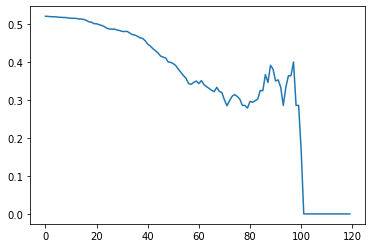

In [65]:
import seaborn as sb

# Make a line plot of how the winrate changes as number of moves changes 

sb.lineplot(data=pastMoveWRArray)

In [66]:
print(pastMoveTotalArray) 

[4256, 4246, 4240, 4234, 4222, 4205, 4196, 4171, 4164, 4146, 4126, 4109, 4083, 4058, 4032, 3993, 3951, 3901, 3849, 3783, 3733, 3663, 3605, 3526, 3442, 3375, 3291, 3197, 3110, 3003, 2903, 2803, 2695, 2609, 2503, 2417, 2322, 2222, 2110, 2020, 1930, 1842, 1744, 1661, 1576, 1489, 1405, 1337, 1257, 1178, 1110, 1048, 988, 926, 871, 810, 735, 665, 612, 552, 510, 470, 429, 379, 330, 292, 261, 240, 214, 191, 160, 144, 124, 113, 105, 97, 86, 77, 70, 61, 54, 51, 47, 43, 40, 37, 30, 26, 23, 21, 20, 17, 15, 14, 12, 11, 11, 10, 7, 7, 6, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [67]:
pastMoveWRArray[20] # I maintained a above-50 winrate for games that were 21 moves or less. 

0.5006697026520225

In [68]:
pastMoveWRArray[21] # Once games were 22 moves or more, I started to have a sub-50 winrate. HOWEVER, it's important
# to understand what this really means. This means that in the other 50% of the time, I either lose or DRAW. Because 
# of the existence of drawn games, it is likely that if I am winning 49.8 % of the time, I am probably winning more
# often than losing as a certain percentage of games will be draws

0.4982254982254982

In [69]:
# Now, I want to find things like average number of moves in won games and in lost games. 

In [70]:
drawrate = sum(bool(x) for x in drawBool) / len(terminationBool)
drawrate

0.06185335132703554

In [71]:
# To get the number of moves in a game, I can start backwards from 120 moves, and if it fulfills it, then I note
# its move count and move on to the next game. Then, after I have this huge array, I can add it as a 
# column to my main dataframe 

movesSeries

0       1. e4 {[%clk 0:09:56.3]} 1... e5 {[%clk 0:09:5...
1       1. e4 {[%clk 0:01:00]} 1... d5 {[%clk 0:01:00]...
2       1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...
3       1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:55]...
4       1. c4 {[%clk 0:09:42.8]} 1... e5 {[%clk 0:09:5...
5       1. d4 {[%clk 0:01:00]} 1... Nc6 {[%clk 0:01:00...
6       1. a3 {[%clk 0:01:00]} 1... d5 {[%clk 0:01:00]...
7       1. d4 {[%clk 0:02:00]} 1... Nf6 {[%clk 0:02:00...
8       1. d4 {[%clk 0:02:00]} 1... e6 {[%clk 0:02:00]...
9       1. e4 {[%clk 0:02:00]} 1... e6 {[%clk 0:02:00]...
10      1. e4 {[%clk 0:09:58.1]} 1... e5 {[%clk 0:09:5...
11      1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:57....
12      1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:58....
13      1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:58....
14      1. e4 {[%clk 0:09:52.2]} 1... e5 {[%clk 0:09:5...
15      1. e3 {[%clk 0:01:00]} 1... e5 {[%clk 0:01:00]...
16      1. e4 {[%clk 0:01:00]} 1... e5 {[%clk 0:01:00]...
17      1. e4 

In [72]:
import re
movesNumberArray = []
for game in movesSeries:
    for i in range(120, 0, -1):
        if re.search(f"{i}\.\.", game): # Using regex to search for a move number within the game
            movesNumberArray.append(i)
            break
        if i == 1: # This is an edge case where the game ends after white plays their first move (no case of 1...)
            movesNumberArray.append(0) # In this case there was 0 "full moves" played in this "game" 
            
print(movesNumberArray)       
            

[31, 18, 57, 2, 50, 46, 39, 11, 11, 29, 13, 29, 19, 63, 32, 35, 34, 31, 23, 27, 0, 30, 109, 27, 38, 12, 75, 33, 20, 19, 41, 39, 18, 40, 32, 16, 28, 36, 47, 0, 29, 57, 31, 25, 48, 59, 21, 39, 70, 16, 42, 10, 9, 19, 27, 3, 27, 3, 44, 24, 39, 25, 24, 30, 46, 20, 54, 0, 25, 45, 48, 5, 30, 19, 21, 22, 6, 46, 25, 56, 10, 31, 11, 26, 17, 0, 0, 15, 39, 23, 20, 27, 18, 6, 15, 56, 36, 49, 28, 29, 47, 13, 49, 64, 37, 0, 0, 36, 47, 44, 39, 26, 45, 42, 0, 7, 32, 0, 44, 33, 0, 15, 21, 0, 35, 22, 44, 29, 30, 33, 42, 18, 36, 48, 30, 45, 15, 78, 10, 27, 31, 33, 58, 21, 16, 36, 37, 19, 22, 78, 37, 28, 24, 28, 27, 33, 58, 33, 47, 1, 21, 29, 24, 33, 27, 25, 31, 25, 0, 25, 13, 26, 20, 35, 18, 32, 24, 26, 44, 32, 21, 7, 62, 23, 47, 18, 20, 20, 16, 12, 4, 23, 29, 28, 18, 30, 26, 36, 27, 42, 9, 0, 0, 0, 33, 63, 39, 6, 23, 17, 20, 5, 1, 0, 39, 0, 19, 14, 35, 42, 9, 29, 29, 38, 35, 44, 45, 37, 41, 37, 59, 21, 29, 54, 30, 19, 17, 20, 32, 53, 38, 28, 27, 53, 66, 16, 13, 42, 32, 36, 29, 74, 38, 53, 106, 52, 44, 5,

In [73]:
len(movesNumberArray) # Ensuring there are the right number of rows to match the rows of our dataframe

4446

In [85]:
df3['Number of Moves'] = movesNumberArray # Adding the move number column to the dataframe
df3.head(25)

/var/folders/j5/g8sfg5_14_v3_nt_gk053jyr0000gn/T/ipykernel_40996/1209889297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Number of Moves'] = movesNumberArray # Adding the move number column to the dataframe


,Event,Site,Date,Round,White,Black,Result,Position,Timezone,ECO,ECOUrl,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link,Moves,Number of Moves
0,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""sandy1999""]\n","[Result ""0-1""]\n","[CurrentPosition ""8/6pk/p6p/2p1p3/2P1b2P/6P1/P...","[Timezone ""UTC""]\n","[ECO ""C46""]\n","[ECOUrl ""https://www.chess.com/openings/Three-...","[UTCDate ""2012.02.01""]\n","[UTCTime ""03:00:12""]\n","[WhiteElo ""1071""]\n","[BlackElo ""1190""]\n","[TimeControl ""600""]\n","[Termination ""sandy1999 won by checkmate""]\n","[StartTime ""03:00:12""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""03:07:13""]\n","[Link ""https://www.chess.com/game/live/2432235...",1. e4 {[%clk 0:09:56.3]} 1... e5 {[%clk 0:09:5...,31
1,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""gemate""]\n","[Result ""1-0""]\n","[CurrentPosition ""r3kb1r/ppp1p2p/q4pp1/8/5NnP/...","[Timezone ""UTC""]\n","[ECO ""A06""]\n","[ECOUrl ""https://www.chess.com/openings/Reti-O...","[UTCDate ""2012.02.01""]\n","[UTCTime ""02:48:32""]\n","[WhiteElo ""849""]\n","[BlackElo ""838""]\n","[TimeControl ""60""]\n","[Termination ""335394862 won on time""]\n","[StartTime ""02:48:32""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""02:50:30""]\n","[Link ""https://www.chess.com/game/live/2432198...",1. e4 {[%clk 0:01:00]} 1... d5 {[%clk 0:01:00]...,18
2,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.02.01""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""projectingpeace""]\n","[Result ""0-1""]\n","[CurrentPosition ""5k2/5P2/5KP1/1P6/3n1q2/8/1n6...","[Timezone ""UTC""]\n","[ECO ""C61""]\n","[ECOUrl ""https://www.chess.com/openings/Ruy-Lo...","[UTCDate ""2012.02.01""]\n","[UTCTime ""02:27:28""]\n","[WhiteElo ""1081""]\n","[BlackElo ""1077""]\n","[TimeControl ""600""]\n","[Termination ""projectingpeace won by checkmate...","[StartTime ""02:27:28""]\n","[EndDate ""2012.02.01""]\n","[EndTime ""02:47:23""]\n","[Link ""https://www.chess.com/game/live/2432131...",1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:10:00]...,57
3,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.31""]\n","[Round ""-""]\n","[White ""335394862""]\n","[Black ""jimmyjimenez""]\n","[Result ""0-1""]\n","[CurrentPosition ""r1bqkbnr/pppp1ppp/2n5/4p3/4P...","[Timezone ""UTC""]\n","[ECO ""C46""]\n","[ECOUrl ""https://www.chess.com/openings/Three-...","[UTCDate ""2012.01.31""]\n","[UTCTime ""01:20:41""]\n","[WhiteElo ""1097""]\n","[BlackElo ""1135""]\n","[TimeControl ""600""]\n","[Termination ""jimmyjimenez won by resignation""]\n","[StartTime ""01:20:41""]\n","[EndDate ""2012.01.31""]\n","[EndTime ""01:20:56""]\n","[Link ""https://www.chess.com/game/live/2426913...",1. e4 {[%clk 0:10:00]} 1... e5 {[%clk 0:09:55]...,2
4,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.31""]\n","[Round ""-""]\n","[White ""nyjah""]\n","[Black ""335394862""]\n","[Result ""0-1""]\n","[CurrentPosition ""8/R7/K2pk1p1/1qr2p2/7P/4P3/5...","[Timezone ""UTC""]\n","[ECO ""A21""]\n","[ECOUrl ""https://www.chess.com/openings/Englis...","[UTCDate ""2012.01.31""]\n","[UTCTime ""01:00:44""]\n","[WhiteElo ""1187""]\n","[BlackElo ""1112""]\n","[TimeControl ""600""]\n","[Termination ""335394862 won by checkmate""]\n","[StartTime ""01:00:44""]\n","[EndDate ""2012.01.31""]\n","[EndTime ""01:19:12""]\n","[Link ""https://www.chess.com/game/live/2426847...",1. c4 {[%clk 0:09:42.8]} 1... e5 {[%clk 0:09:5...,50
5,"[Event ""Live Chess""]\n","[Site ""Chess.com""]\n","[Date ""2012.01.30""]\n","[Round ""-""]\n","[White ""mollyjones""]\n","[Black ""335394862""]\n","[Result ""1-0""]\n","[CurrentPosition ""1k6/8/8/1RB1N3/1P3P2/PP2P1P1...","[Timezone ""UTC""]\n","[ECO ""A40""]\n","[ECOUrl ""https://www.chess.com/openings/Queens...","[UTCDate ""2012.01.30""]\n","[UTCTime ""02:04:15""]\n","

In [75]:
# Finding average number of moves in won games (terminationBool is essentially winBool)

terminationBool



0       False
1        True
2       False
3       False
4        True
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12       True
13      False
14       True
15      False
16      False
17      False
18       True
19      False
20       True
21      False
22      False
23      False
24       True
25       True
26      False
27       True
28       True
29      False
30      False
31      False
32       True
33       True
34      False
35      False
36      False
37      False
38       True
39      False
40       True
41      False
42      False
43       True
44       True
45      False
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55      False
56       True
57      False
58      False
59      False
60       True
61       True
62      False
63      False
64       True
65      False
66      False
67       True
68      False
69      False
70       True
71    

In [76]:
numberMovesSeries = pd.Series(df3['Number of Moves'].values)

In [77]:
numberMovesTerminationSeries = numberMovesSeries[terminationBool] # These are all the move counts of the games I won

numberMovesTerminationSeries # First column is index of game and second column is number of moves in the game




1        18
4        50
12       19
14       32
18       23
20        0
24       38
25       12
27       33
28       20
32       18
33       40
38       47
40       29
43       25
44       48
46       21
47       39
48       70
49       16
50       42
51       10
52        9
53       19
54       27
56       27
60       39
61       25
64       46
67        0
70       48
72       30
76        6
77       46
78       25
86        0
87       15
89       23
90       20
92       18
93        6
96       36
98       28
99       29
101      13
102      49
104      37
106       0
108      47
109      44
110      39
113      42
115       7
120       0
121      15
122      21
125      22
127      29
128      30
134      30
136      15
138      10
140      31
143      21
144      16
147      19
150      37
151      28
153      28
155      33
157      33
159       1
163      33
165      25
166      31
167      25
169      25
172      20
173      35
176      24
177      26
180      21
183      23
184 

In [78]:
# Now, to find the average move count I just take the sum divided by the length of the series

avgMoveCountForWins = sum(numberMovesTerminationSeries) / len(numberMovesTerminationSeries)
avgMoveCountForWins # It takes me around 36 moves on average to win

35.69261040664626

In [79]:
numberMovesLossSeries = numberMovesSeries[lossBool] # These are all the move counts of the games I won

numberMovesLossSeries

0        31
2        57
3         2
5        46
6        39
7        11
8        11
9        29
10       13
11       29
13       63
15       35
16       34
17       31
19       27
21       30
22      109
23       27
26       75
29       19
30       41
31       39
34       32
35       16
36       28
37       36
39        0
41       57
42       31
57        3
58       44
59       24
62       24
63       30
65       20
66       54
68       25
69       45
71        5
73       19
74       21
75       22
79       56
80       10
81       31
82       11
83       26
84       17
85        0
88       39
91       27
94       15
95       56
97       49
100      47
103      64
105       0
107      36
111      26
112      45
114       0
116      32
117       0
118      44
119      33
123       0
124      35
126      44
129      33
130      42
131      18
132      36
133      48
135      45
139      27
141      33
142      58
145      36
146      37
148      22
149      78
152      24
154      27
156 

In [80]:
avgMoveCountForLosses = sum(numberMovesLossSeries) / len(numberMovesLossSeries)
avgMoveCountForLosses # On average, I lose in around 39 moves. This could mean I generally lose in longer games

38.831740976645435

In [81]:
numberMovesDrawSeries = numberMovesSeries[drawBool] # These are all the move counts of the games I drew

numberMovesDrawSeries

45      59
55       3
137     78
230     59
262     52
277     59
320     84
342     34
364     75
419      0
441     40
472      0
482      0
488     67
490     45
498     59
510     62
526      0
553     19
600     35
651     55
674     54
684     83
726      0
733     61
766     49
776     55
788     24
797     40
823      0
867     50
883     30
896     76
926     61
945     83
950     44
951     56
965     60
975     46
988     70
993     46
996     63
1000    46
1001    68
1004    70
1007    57
1008    42
1055    50
1060    41
1061     0
1072    47
1073    68
1074     0
1076     0
1100    48
1102    72
1103    88
1142    60
1175    57
1179    65
1215    61
1216    59
1240    51
1251    65
1346    58
1363    54
1405    19
1440    73
1445    58
1449    44
1456    30
1457    70
1462    76
1463    83
1478    47
1545    67
1549    69
1559    72
1561    27
1562    70
1569    45
1587    32
1623    53
1626    39
1641    59
1643    54
1654    69
1673    54
1683    67
1735    56
1739    23

In [82]:
avgMoveCountForDraws = sum(numberMovesDrawSeries) / len(numberMovesDrawSeries)
avgMoveCountForDraws # On average, my drawn games take 52 moves. This makes sense because the closer the game is,
# the more likely it'll turn into a draw. Games lasting longer are typically closer.

52.20727272727273

In [83]:
# This concludes Part 1 of my Personal Chess Analysis Project. I performed an EDA on my games, where I played around
# with a messy dataset and converted it into a usable dataframe. I found out interesting weaknesses in my play, such 
# as how I struggle against 1.c4 the most as black and 1... e6 as white

# In Part 2 of my project, I hope to incorporate machine learning by predicting the outcome of games based on the use 
# of central squares and rating differential. Rating differential is a topic I find very interesting as it varies 
# between people: some people perform better against stronger opponents than their rating would suggest, and some 
# play worse against weaker opponents than their rating would suggest. I hope to create a model that would be trained
# on my dataset of games to see if common principles like controlling the center and things like rating differential
# play a large role in determining who wins the game.